In [1]:
%%capture
import numpy as np
from keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
from tqdm import tqdm

from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import (Dropout, Input, Embedding, Concatenate)

from cGAN import *

In [2]:
# load image data
dataset = load_real_samples()
images, labels = dataset
n_classes = max(labels)

In [3]:
latent_dim = 100
G = Generator(latent_dim)
D = Discriminator()
gan = GAN(G, D)

100%|██████████| 468/468 [00:29<00:00, 15.96it/s]


>1/12, disc_loss=0.633, gan_loss=0.908
origin:


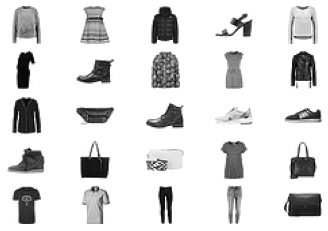

make:


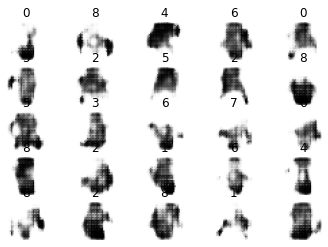

100%|██████████| 468/468 [00:23<00:00, 20.23it/s]


>2/12, disc_loss=0.606, gan_loss=0.844
origin:


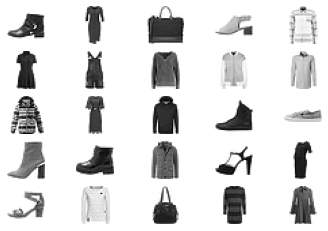

make:


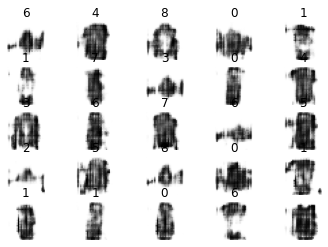

100%|██████████| 468/468 [00:22<00:00, 20.59it/s]


>3/12, disc_loss=0.595, gan_loss=0.914
origin:


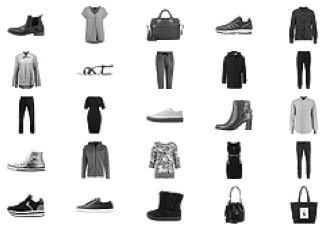

make:


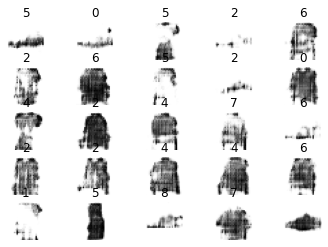

100%|██████████| 468/468 [00:22<00:00, 20.43it/s]


>4/12, disc_loss=0.627, gan_loss=0.775
origin:


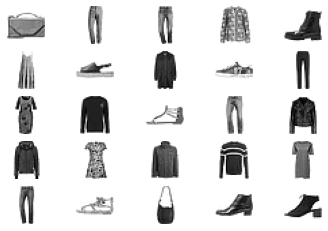

make:


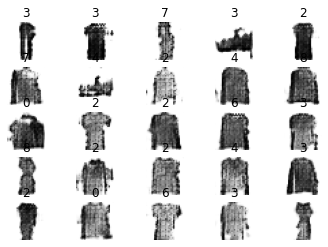

100%|██████████| 468/468 [00:22<00:00, 20.52it/s]


>5/12, disc_loss=0.596, gan_loss=0.889
origin:


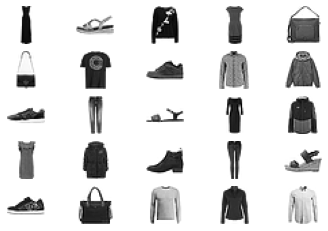

make:


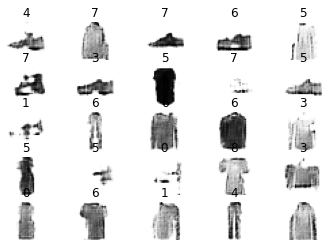

100%|██████████| 468/468 [00:22<00:00, 20.38it/s]


>6/12, disc_loss=0.626, gan_loss=0.851
origin:


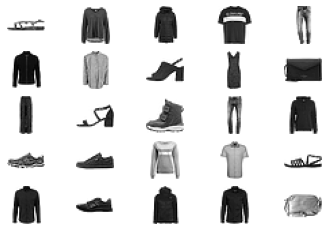

make:


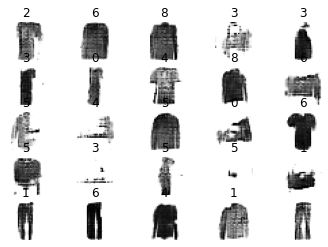

100%|██████████| 468/468 [00:22<00:00, 20.71it/s]


>7/12, disc_loss=0.575, gan_loss=1.010
origin:


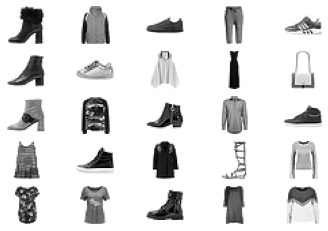

make:


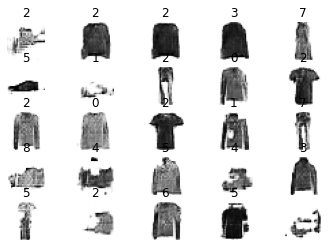

100%|██████████| 468/468 [00:22<00:00, 20.59it/s]


>8/12, disc_loss=0.655, gan_loss=0.910
origin:


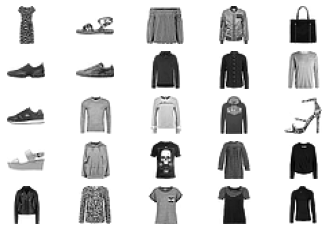

make:


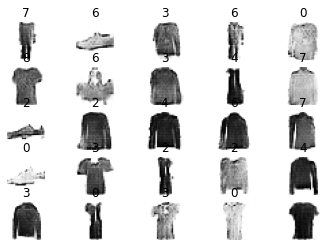

100%|██████████| 468/468 [00:23<00:00, 20.20it/s]


>9/12, disc_loss=0.619, gan_loss=0.926
origin:


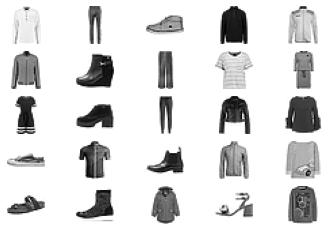

make:


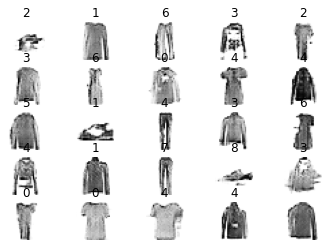

100%|██████████| 468/468 [00:23<00:00, 20.28it/s]


>10/12, disc_loss=0.629, gan_loss=0.885
origin:


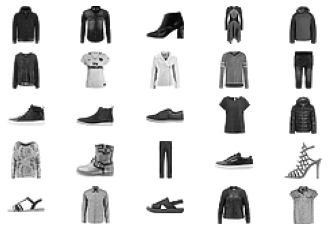

make:


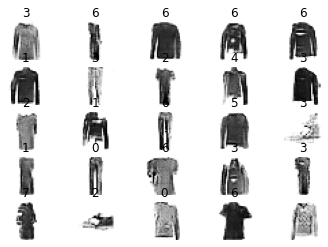

100%|██████████| 468/468 [00:22<00:00, 20.37it/s]


>11/12, disc_loss=0.621, gan_loss=0.838
origin:


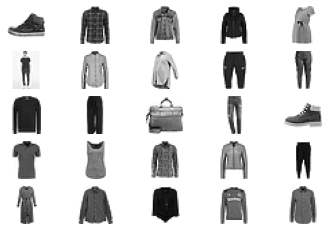

make:


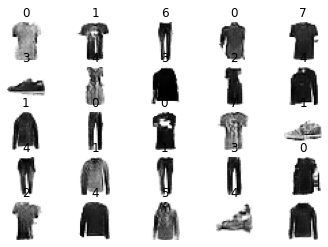

100%|██████████| 468/468 [00:23<00:00, 20.35it/s]


>12/12, disc_loss=0.611, gan_loss=0.904
origin:


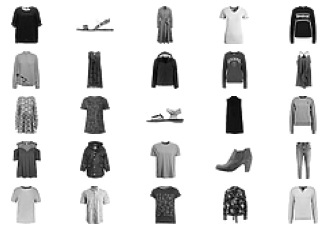

make:


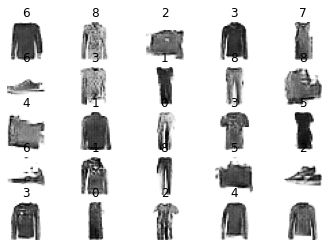

In [4]:
# train model
batch_size = 128
n_epochs = 12
n_batch = int(images.shape[0] / batch_size)

for i in range(n_epochs):
    for j in tqdm(range(n_batch)):
        x_img, y_img = generate_dcm_batch(G, dataset, batch_size, latent_dim, n_classes)
        d_loss, _ = D.train_on_batch(x_img, y_img)

        x_hid, y_hid = generate_gan_batch(latent_dim, batch_size, n_classes)
        g_loss = gan.train_on_batch(x_hid, y_hid)  # the D is frozen in gan

    # summarize loss on this epoch
    print('>%d/%d, disc_loss=%.3f, gan_loss=%.3f' % (i + 1, n_epochs, d_loss, g_loss))
    h = np.random.randn(batch_size, latent_dim)
    l = np.random.randint(0, n_classes, batch_size)
    x_img_make = G.predict([h, l])
    print("origin:")
    show_plot(x_img[0], 5)  # x_img = x_img, x_label
    print("make:")
    show_plot(x_img_make, 5, titles=[str(d) for d in l])

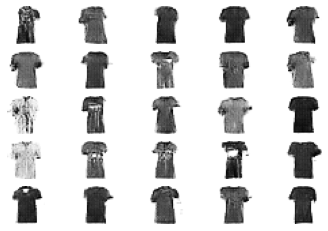

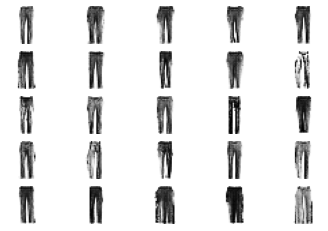

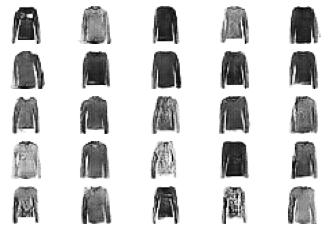

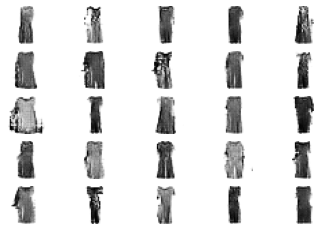

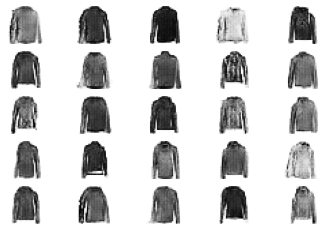

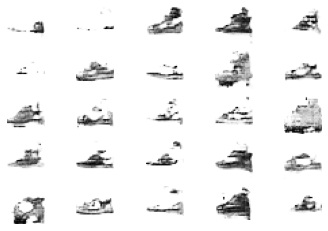

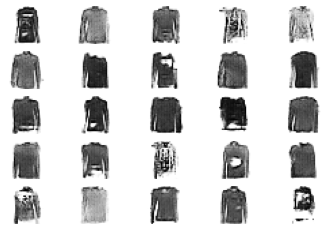

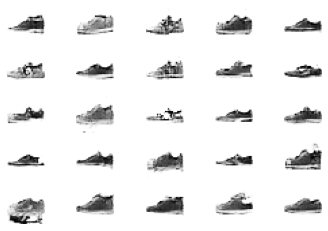

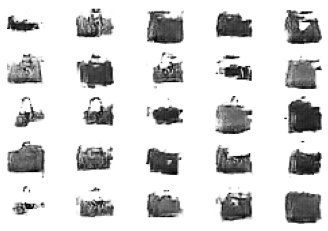

In [6]:
# showcase
for i in range(n_classes):
    h = np.random.randn(batch_size, latent_dim)
    l = np.array([i for _ in range(batch_size)])
    x_img_make = G.predict([h, l])
    show_plot(x_img_make, 5)
